# Compare VQPE, UVQPE, and QCELS 

In [1]:
from __future__ import division
import sys,math,random,numpy as np,numpy.typing as npt,scipy,itertools,tqdm,warnings,matplotlib.pylab as pl
from numpy import linalg as LA, inf
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from matplotlib import pyplot as plt, cm as cm, mlab as ml, rc
from matplotlib.colors import LinearSegmentedColormap, LogNorm, Normalize
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from scipy.linalg import svd,eig,eigh,toeplitz,circulant,lstsq
from scipy.io import savemat, loadmat
from ipynb.fs.full.VQPE_utilities import S_gen,H_gen,VQPE_dmd,UVQPE_dmd
from ipynb.fs.full.QCELS_utilities import fit_data, QCELS_gse
import pickle

###### Relevant VQPE, UVQPE, QCELS routines are imported from VQPE_utilities and QCELS_utilities ######

# ====== Read in Heisenberg Hamiltonian eigenvalues and overlaps between the reference state and eigenstates ======
# Heis_8: system of 8 spins
# Heis_12: system of 12 spins
# 'overlaps_data.pkl' can be generated by running get_overlaps_and_convergence_metrics_Fig5.py 
#                     or provided upon request

with open('overlaps_data.pkl', 'rb') as file:
    spin_data = pickle.load(file)
    
Heis_8, Heis_12 = spin_data[8], spin_data[12]

R2: 0.975498
RMSE: 0.068908
R2: 0.985383
RMSE: 0.0695406


In [2]:
# ====== Generate linear time grid ======
# Tmax_8: total number of time steps (8-spin system)
# Tmax_12: total number of time steps (12-spin system)
# unit timesteps are 0.15 and 0.1 for 8-spin and 12-spin systems

Tmax_8, Tmax_12 = 250, 250
Heis_8_tgrid = 0.15*np.arange(Tmax_8) 
Heis_12_tgrid = 0.1*np.arange(Tmax_12) 

# ====== Load Hamiltonian spectrum ======
# E_8: Hamiltonian spectrum (8-spin system)
# E_12: Hamiltonian spectrum (12-spin system)

E_8 = Heis_8['H'][0].reshape((256,1))
E_12 = Heis_12['H'][0].reshape((4096,1))
print(E_8[0], E_12[0])

# ====== Load overlap matrix elements ======
# Heis_8_S: overlap matrix elements over 250 time steps (8-spin system)
# Heis_12_S: overlap matrix elements over 250 time steps (12-spin system)

Heis_8_S = loadmat('spin_S_Fig2l.mat')['dataS'].flatten()
Heis_12_S = loadmat('spin_S_Fig2m.mat')['dataS'].flatten()

# ====== Noise level ======
eps = 0.01

[-14.60437364] [-21.54956367]


# Initial State with Higher Overlap

## $L=$8 Spins

In [42]:
# ====== Run QCELS (imported from QCELS_utilities) ======
init_bounds = np.array([-14.75, -14.5])
qcels_Heis_8 = QCELS_gse(Heis_8_S[1:Tmax_8], Heis_8_tgrid[1:Tmax_8], E_8, init_bounds)

## $L=$12 Spins

In [43]:
# ====== Run QCELS (imported from QCELS_utilities) ======
init_bounds = np.array([-21.75, -21.5])
qcels_Heis_12 = QCELS_gse(Heis_12_S[1:Tmax_12], Heis_12_tgrid[1:Tmax_12], E_12, init_bounds)

In [30]:
# np.savetxt('qcels_Heis_8_eps%g.dat' % eps, np.c_[2*np.arange(1,Tmax_8),np.abs(qcels_Heis_8.flatten())])
# np.savetxt('qcels_Heis_12_eps%g.dat' % eps, np.c_[2*np.arange(1,Tmax_12),np.abs(qcels_Heis_12.flatten())])

## Plot estimated ground state energy

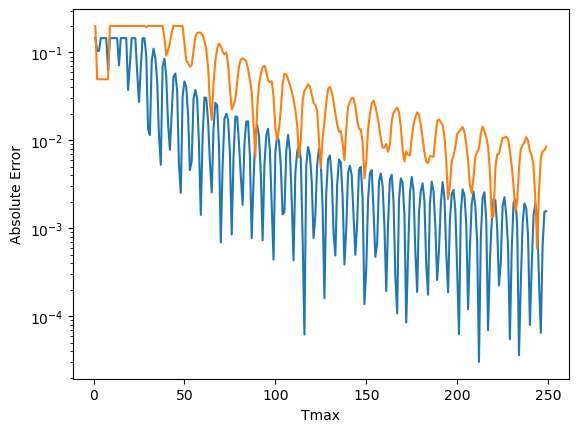

In [48]:
plt.plot(np.arange(1,Tmax_8),np.abs(qcels_Heis_8.flatten()))
plt.plot(np.arange(1,Tmax_12),np.abs(qcels_Heis_12.flatten()))
plt.xlabel('Tmax')
plt.ylabel('Absolute Error')
plt.yscale('log')

# Initial State with Lower Overlap (Fig.5 Left and Middle)

In [3]:
# ====== Load overlap matrix elements ======
# Heis_8_Slo: overlap matrix elements over 250 time steps with a poorer reference state (8-spin system)
#             Fig 5 left panel
# Heis_12_Slo: overlap matrix elements over 250 time steps with a poorer reference state (12-spin system)
#              Fig 5 middle panel

Heis_8_Slo = loadmat('spin_Slo_Fig2l.mat')['dataS'].flatten()
Heis_12_Slo = loadmat('spin_Slo_Fig2m.mat')['dataS'].flatten()

## $L=$8 Spins

In [4]:
# ====== Run QCELS (imported from QCELS_utilities) ======
init_bounds = np.array([-14.75, -14.5])
qcels_Heis_8_lo = QCELS_gse(Heis_8_Slo[1:Tmax_8], Heis_8_tgrid[1:Tmax_8], E_8, init_bounds)

## $L=$12 Spins

In [51]:
# ====== Run QCELS (imported from QCELS_utilities) ======
init_bounds = np.array([-21.75, -21.5])
qcels_Heis_12_lo = QCELS_gse(Heis_12_Slo[1:Tmax_12], Heis_12_tgrid[1:Tmax_12], E_12, init_bounds)

In [7]:
# np.savetxt('qcels_Heis_8_lo_eps%g.dat' % eps, np.c_[2*np.arange(1,Tmax_8),np.abs(qcels_Heis_8_lo.flatten())])
# np.savetxt('qcels_Heis_12_lo_eps%g.dat' % eps, np.c_[2*np.arange(1,Tmax_12),np.abs(qcels_Heis_12_lo.flatten())])

## Plot estimated ground state energy

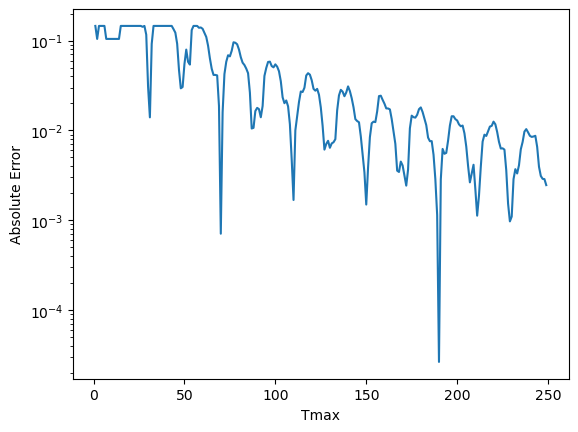

In [6]:
plt.plot(np.arange(1,Tmax_8),np.abs(uqcels_Heis_8_lo.flatten()))
plt.plot(np.arange(1,Tmax_12),np.abs(uqcels_Heis_12_lo.flatten()))
plt.xlabel('Tmax')
plt.ylabel('Absolute Error')
plt.yscale('log')

In [ ]:


# Fig 6 left panel
# Fig 6 middle panel
# Fig 6 right panel
